**Importing Libraries**

In [16]:

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout

**Resizing the image,loading the dataset and listing the labels of the dataset is done here**

In [17]:
# Set image dimensions
img_rows, img_cols = 102, 136
data_path = 'C:/Users/Sai/Downloads/Face_Mask_Detection22/dataset'

# Initialize lists for images (x) and labels (y)
x, y = [], []
counter = 0

# Get the class labels
classes = os.listdir(data_path)
print(classes)

['without_mask', 'with_mask']


**Converting the image into arrays**

In [18]:
# Iterate through 'with_mask' and 'without_mask' directories
for class_path in os.listdir(data_path):
    class_folder_path = os.path.join(data_path, class_path)

    # Ensure it's a directory
    if os.path.isdir(class_folder_path):
        for img_path in os.listdir(class_folder_path):
            img_full_path = os.path.join(class_folder_path, img_path)

            # Load image and resize
            image = load_img(img_full_path, target_size=(img_rows, img_cols))

            # Convert image to array
            image = img_to_array(image)

            # Append image to 'x' and label (counter) to 'y'
            x.append(image)
            y.append(counter)

    # Increment label counter for the next class
    counter += 1

# Convert lists to numpy arrays for model processing
x = np.array(x)
y = np.array(y)

**Splitting into training,validation and testing dataset**

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_val = keras.utils.to_categorical(y_val, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

X_train.shape

(6042, 102, 136, 3)

**Defining the convolutional layer**

In [9]:
model = Sequential()
model.add(Conv2D(6, (5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(16, (5,5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 132, 6)        456       
                                                                 
 average_pooling2d (Average  (None, 49, 66, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 62, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 22, 31, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 10912)             0         
                                                                 
 dense (Dense)               (None, 120)               

**Training the dataset**

In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['Accuracy'])
history = model.fit(X_train, y_train, batch_size=120, validation_data = (X_val, y_val), epochs=10)


Epoch 1/10


51/51 [==============================] - 11s 154ms/step - loss: 7.6239 - Accuracy: 0.6442 - val_loss: 0.4631 - val_Accuracy: 0.8172
Epoch 2/10
51/51 [==============================] - 7s 132ms/step - loss: 0.3430 - Accuracy: 0.8684 - val_loss: 0.3301 - val_Accuracy: 0.8768
Epoch 3/10
51/51 [==============================] - 7s 133ms/step - loss: 0.2041 - Accuracy: 0.9245 - val_loss: 0.3213 - val_Accuracy: 0.8940
Epoch 4/10
51/51 [==============================] - 7s 129ms/step - loss: 0.1477 - Accuracy: 0.9464 - val_loss: 0.3044 - val_Accuracy: 0.9007
Epoch 5/10
51/51 [==============================] - 7s 134ms/step - loss: 0.0969 - Accuracy: 0.9692 - val_loss: 0.3270 - val_Accuracy: 0.9020
Epoch 6/10
51/51 [==============================] - 7s 136ms/step - loss: 0.0735 - Accuracy: 0.9788 - val_loss: 0.3608 - val_Accuracy: 0.8874
Epoch 7/10
51/51 [==============================] - 7s 140ms/step - loss: 0.0629 - Accuracy: 0.9808 - val_loss: 0.3736 - val_Accuracy: 0.8980
Ep

**Evaluating the model**

In [11]:
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

24/24 [==============================] - 0s 12ms/step - loss: 0.4170 - Accuracy: 0.9153
Test loss: 0.41701555252075195
Test accuracy: 0.9153439402580261


In [5]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(15):
    plt.subplot(5, 3, i + 1)
    plt.imshow(X_test[i].astype("uint8"), cmap='gray')  # Display the test image
    plt.axis('off')
    plt.text(0.5, -0.15, f"Pred: {predicted_labels[i]}", fontsize=12, ha='center', transform=plt.gca().transAxes)

plt.show()
print(predicted_labels)

#**Plotting the accuracy and loss plots accross the epochs**

NameError: name 'X_test' is not defined

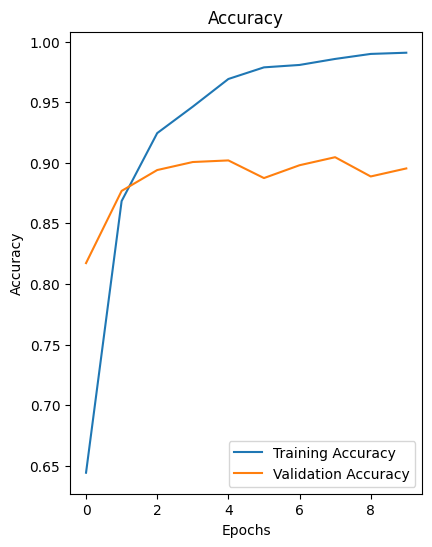

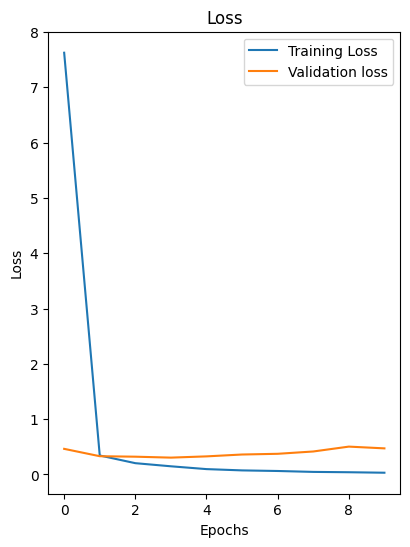

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['Accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_Accuracy'], label= 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

**Saving the model file for future use**

In [14]:
model.save('face_mask_detection_model.h5')

In [20]:
# Check available keys
print(history.history.keys())

# Access metrics based on available keys
train_accuracy = history.history.get('accuracy', history.history.get('acc', []))
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc', []))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print out the metrics
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)


dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])
Training Accuracy: []
Validation Accuracy: []
Training Loss: [7.6239213943481445, 0.3430124819278717, 0.20411331951618195, 0.1477004885673523, 0.09686960279941559, 0.07353372871875763, 0.06285497546195984, 0.046404458582401276, 0.04030207172036171, 0.03153109923005104]
Validation Loss: [0.46308016777038574, 0.33007392287254333, 0.3213070333003998, 0.3044430613517761, 0.32698947191238403, 0.3607625961303711, 0.3735508322715759, 0.4153895378112793, 0.5034645199775696, 0.4717557728290558]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 132, 6)        456       
                                                                 
 average_pooling2d (Average  (None, 49, 66, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 62, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 22, 31, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 10912)             0         
                                                                 
 dense (Dense)               (None, 120)               1

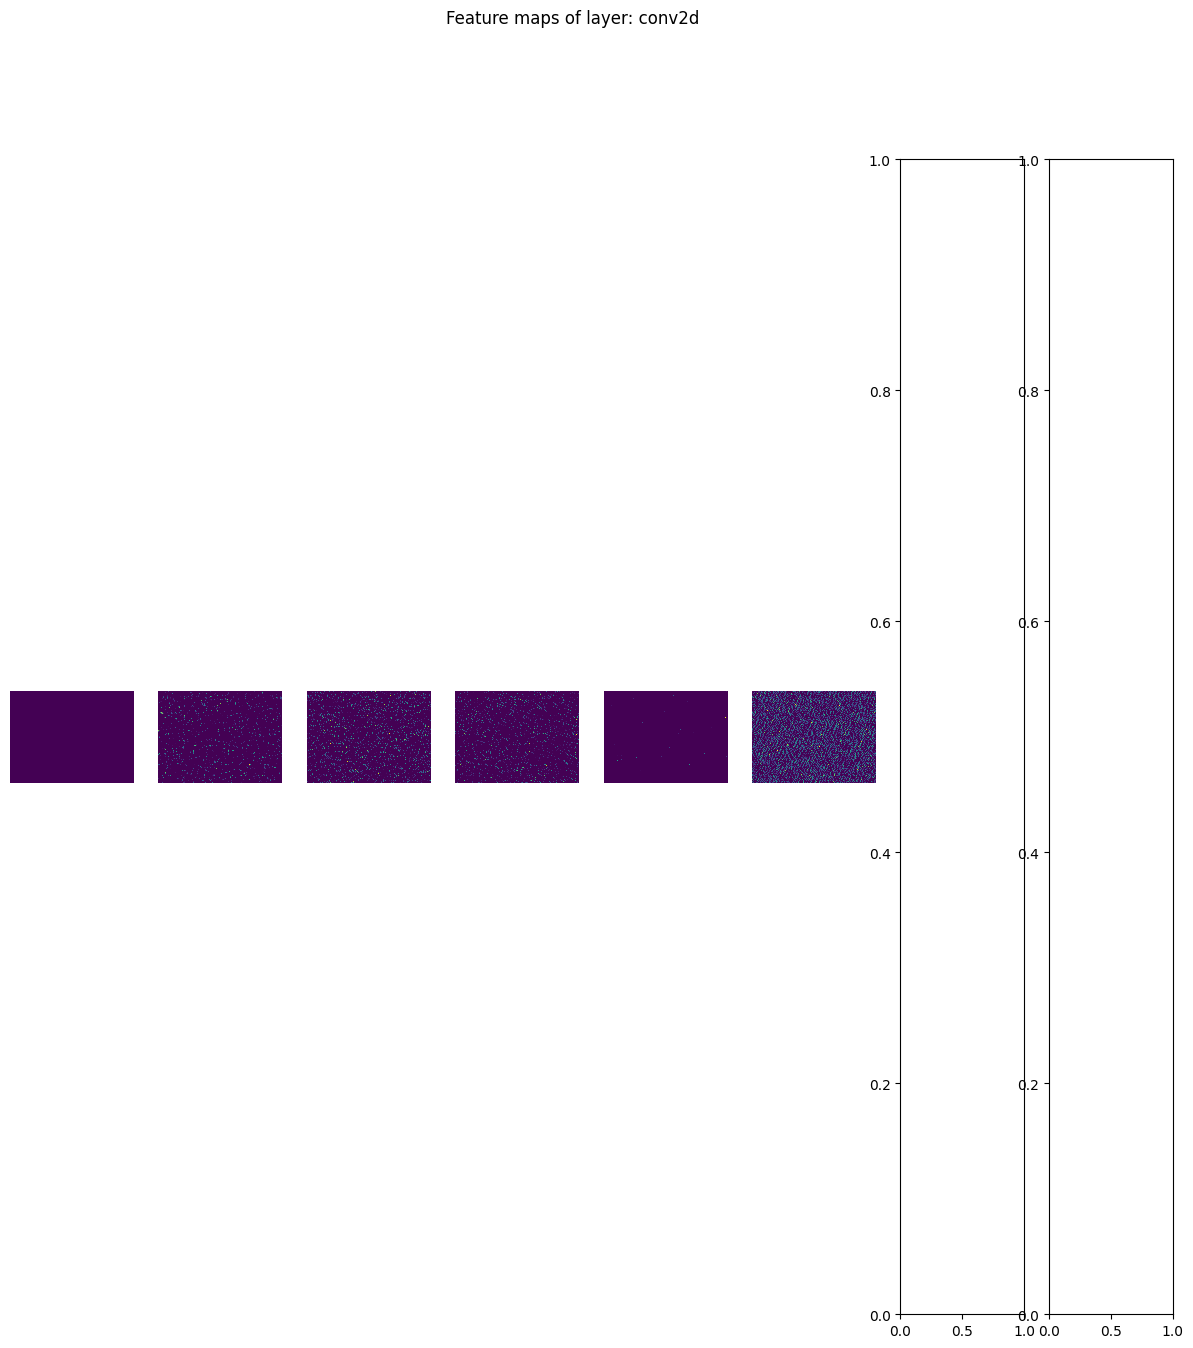

Visualizing feature maps of layer: average_pooling2d


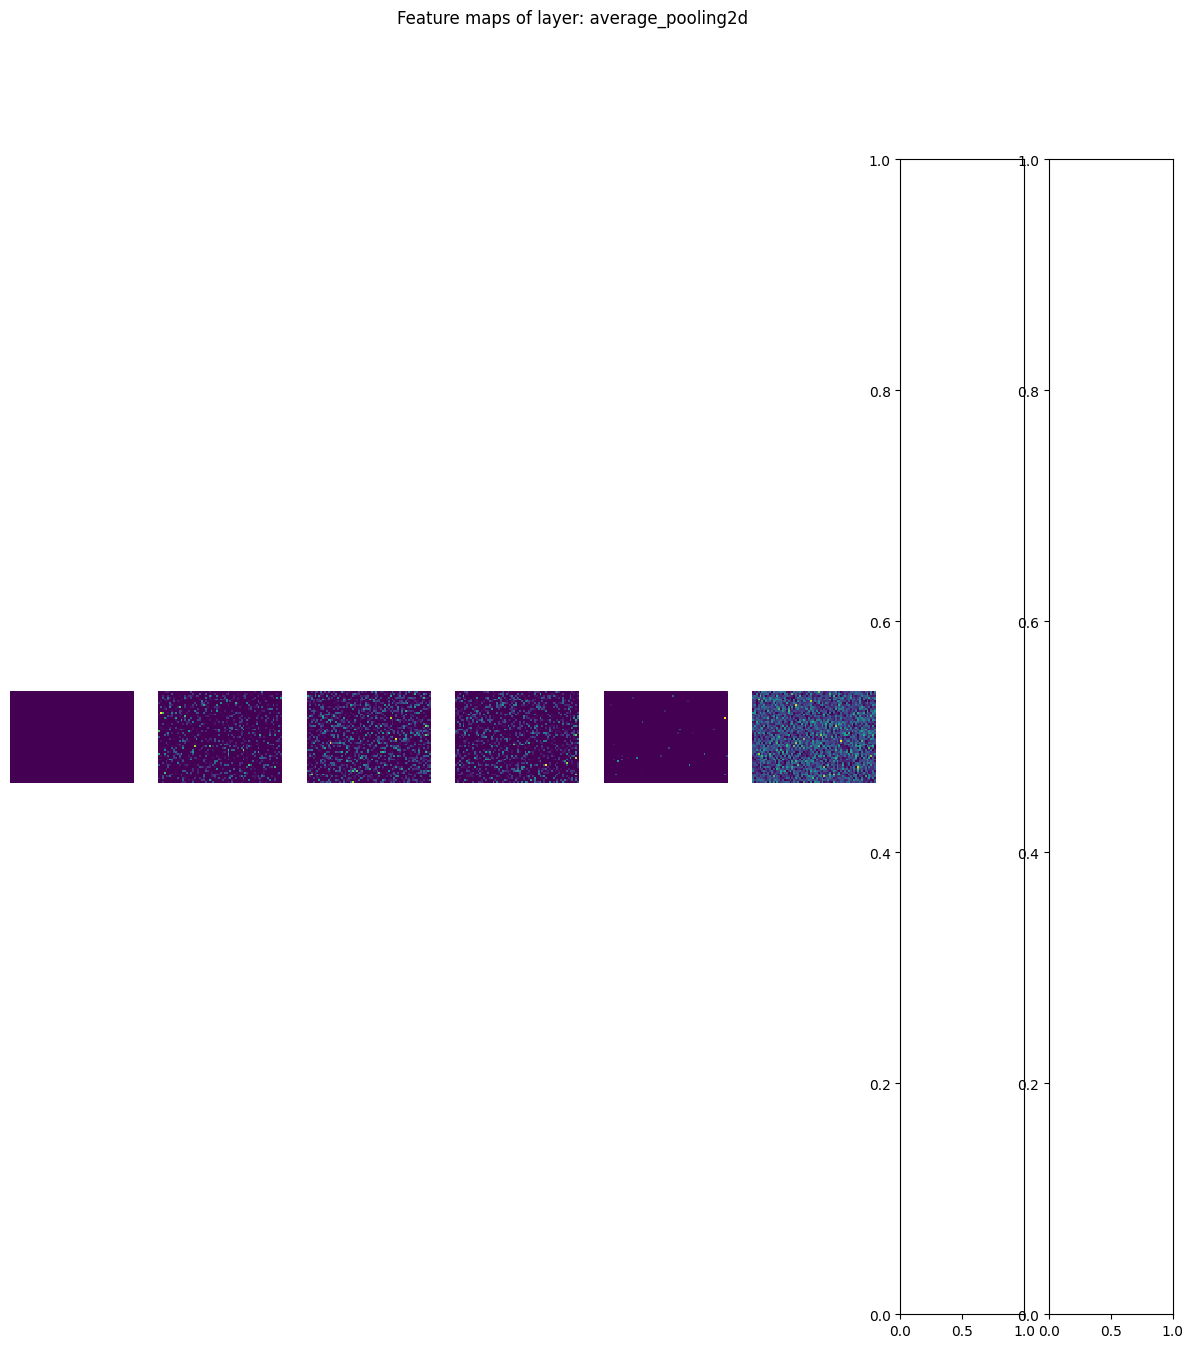

Visualizing feature maps of layer: conv2d_1


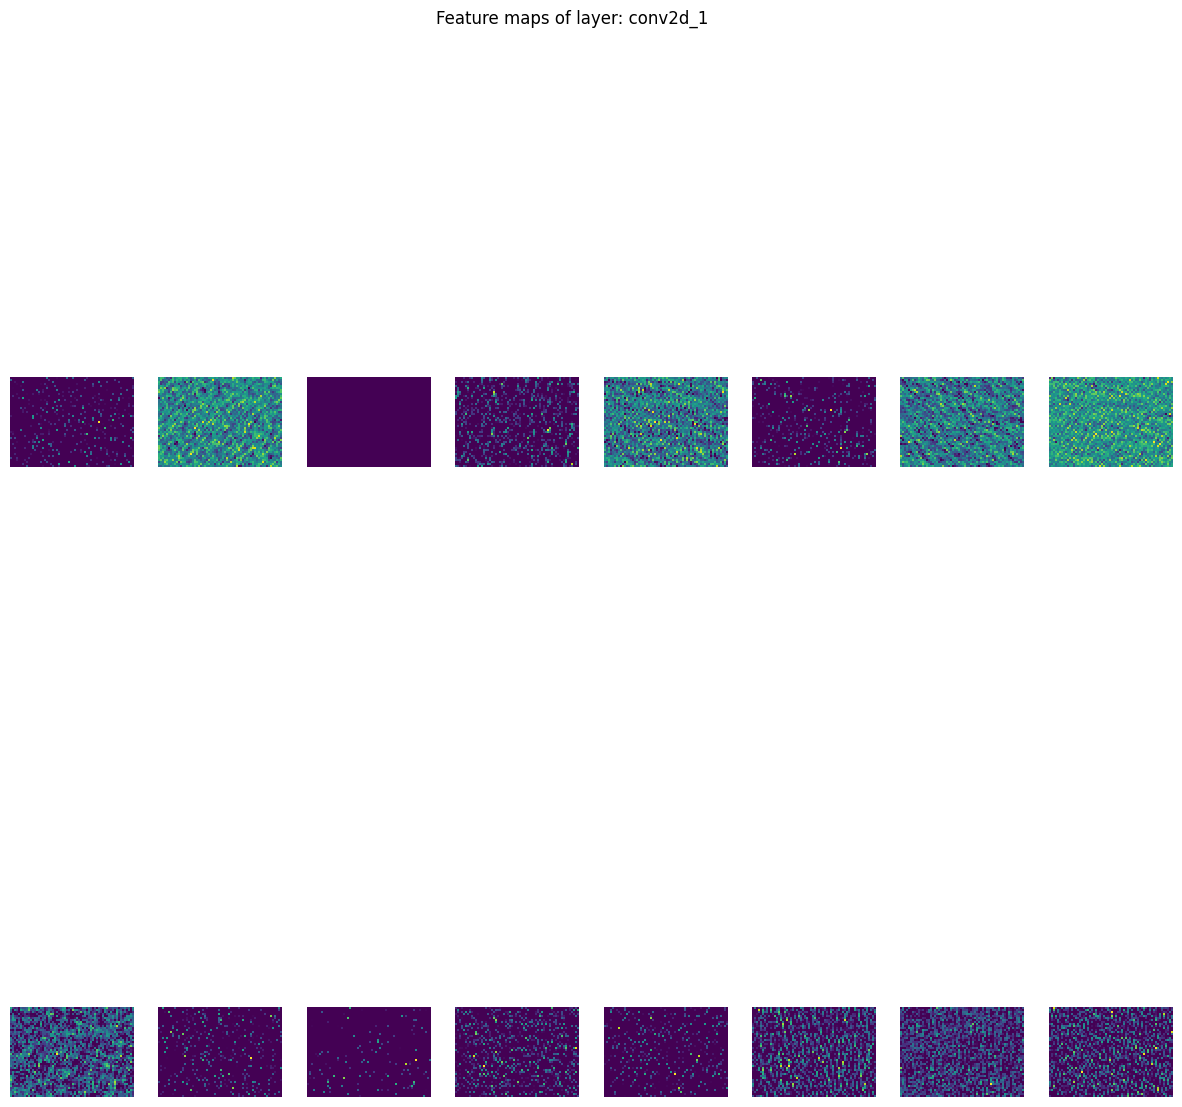

Visualizing feature maps of layer: average_pooling2d_1


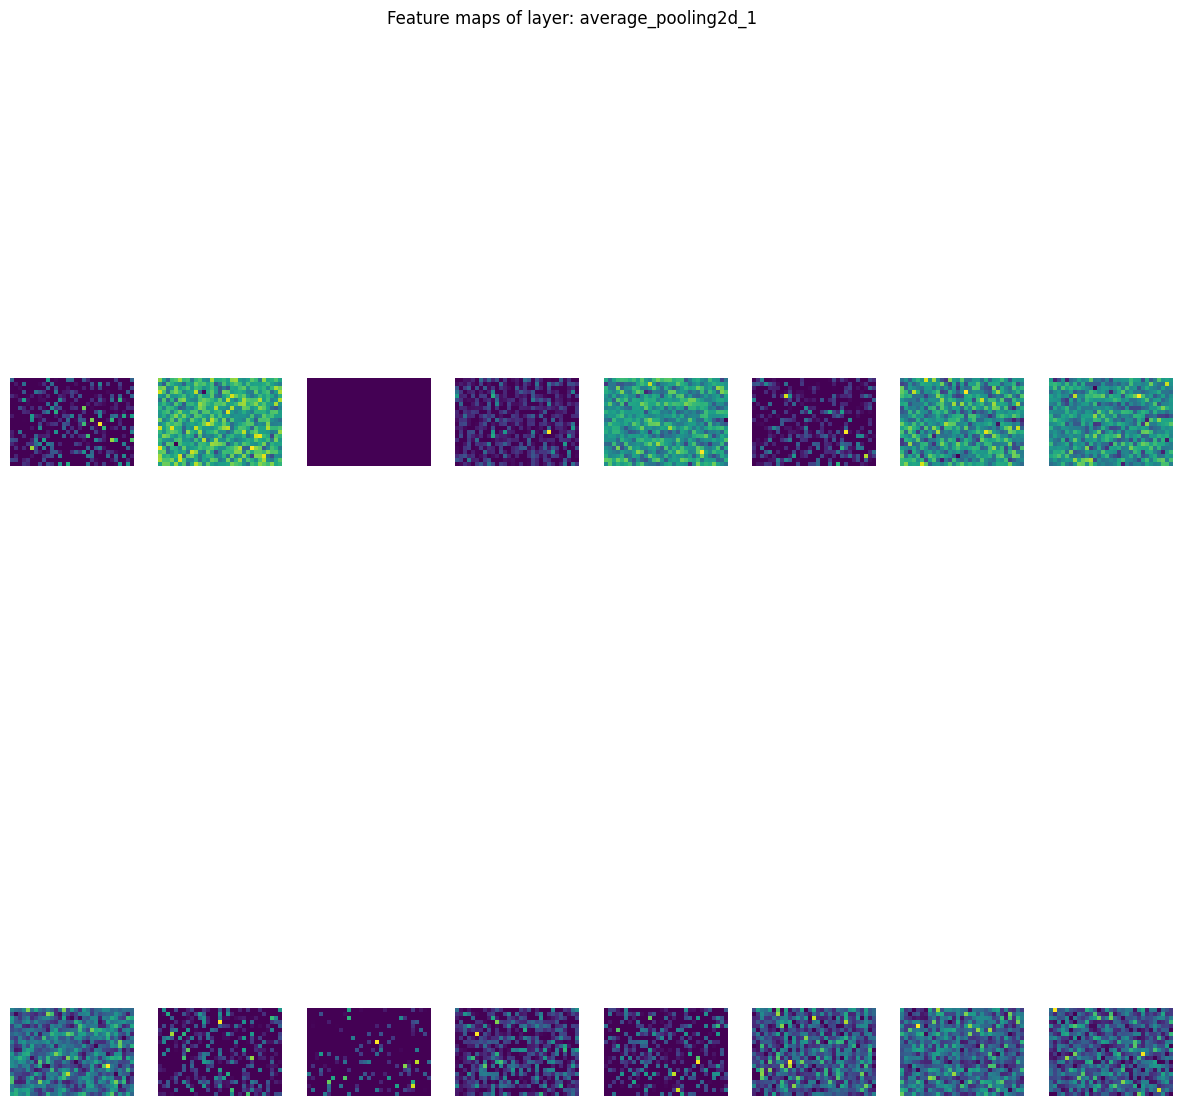

Visualizing activations of layer: flatten


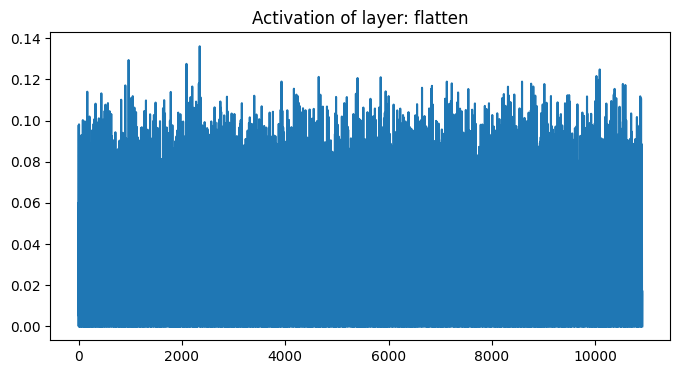

Visualizing activations of layer: dense


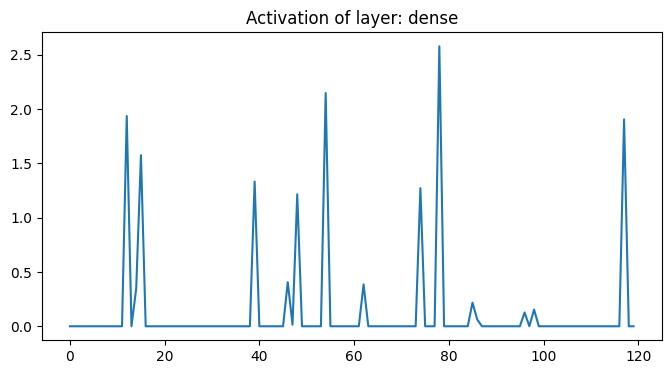

Visualizing activations of layer: dense_1


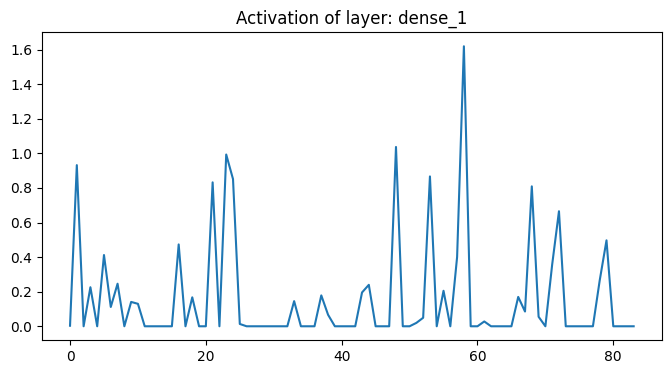

Visualizing activations of layer: dense_2


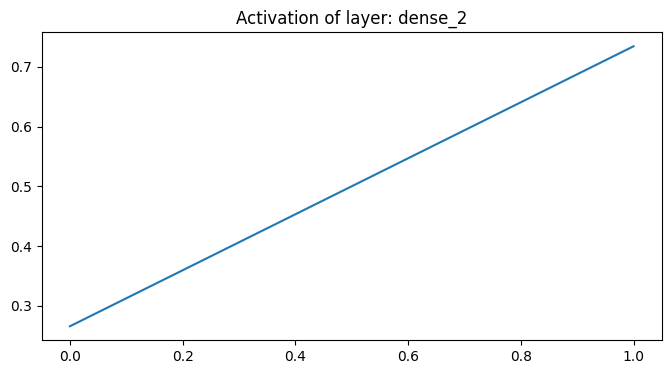

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model, Model

# Load your model
model_path = r"C:\Users\Sai\Desktop\ML_REPORT\face_mask_detection_model.h5"
model = load_model(model_path)

# Print the model summary to verify the input shape
print(model.summary())

# Check the expected input shape
expected_shape = model.input.shape[1:]  # (102, 136, 3)
print(f"Expected input shape: {expected_shape}")

# Correct sample input shape
sample_input = np.random.random((1, 102, 136, 3))  # Adjusted to match model input shape

# Function to visualize layer outputs
def visualize_layer_outputs(model, input_data):
    """
    Visualizes the outputs of intermediate layers for a given model and input data.
    
    :param model: The Keras model
    :param input_data: Input data to pass through the model
    """
    # Create a model that outputs intermediate layer activations
    layer_outputs = [layer.output for layer in model.layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    # Predict activations for the input data
    activations = activation_model.predict(input_data)

    # Loop through each layer and visualize the outputs
    for i, activation in enumerate(activations):
        layer_name = model.layers[i].name
        if len(activation.shape) == 4:  # Convolutional layers
            print(f"Visualizing feature maps of layer: {layer_name}")
            num_filters = activation.shape[-1]
            size = activation.shape[1:3]

            # Display feature maps
            n_cols = 8  # Columns for the grid
            n_rows = num_filters // n_cols + (num_filters % n_cols > 0)
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

            for j in range(num_filters):
                row, col = divmod(j, n_cols)
                if n_rows > 1:
                    ax = axes[row, col] if j < num_filters else None
                else:
                    ax = axes[col] if j < num_filters else None

                if ax is not None:
                    ax.matshow(activation[0, :, :, j], cmap='viridis')
                    ax.axis('off')

            plt.suptitle(f"Feature maps of layer: {layer_name}")
            plt.show()

        elif len(activation.shape) == 2:  # Dense layers
            print(f"Visualizing activations of layer: {layer_name}")
            plt.figure(figsize=(8, 4))
            plt.plot(activation[0])
            plt.title(f"Activation of layer: {layer_name}")
            plt.show()

# Visualize layer outputs
visualize_layer_outputs(model, sample_input)
